In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic.csv',usecols=['Fare','Age','Survived'])

In [3]:
data.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
data.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
data.shape

(418, 3)

In [6]:
data['Age'].fillna(np.mean(data['Age']),inplace=True)

In [7]:
data['Fare'].fillna(np.mean(data['Fare']),inplace=True)

In [8]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [55]:
x=data[['Age','Fare']]
y=data['Survived']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/tmp/ipykernel_3663/1863081735.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=x["Age"], shade=True)


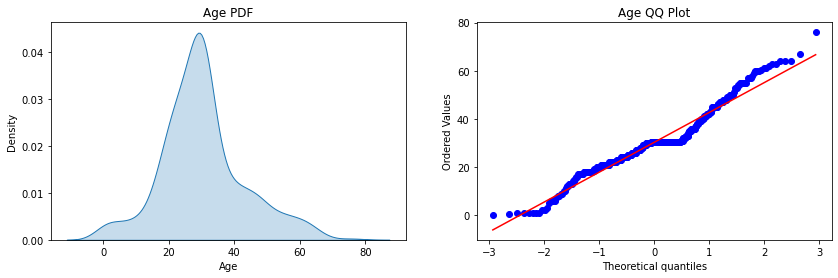

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(data=x["Age"], shade=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()


/tmp/ipykernel_3663/54474942.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=x["Fare"], shade=True)


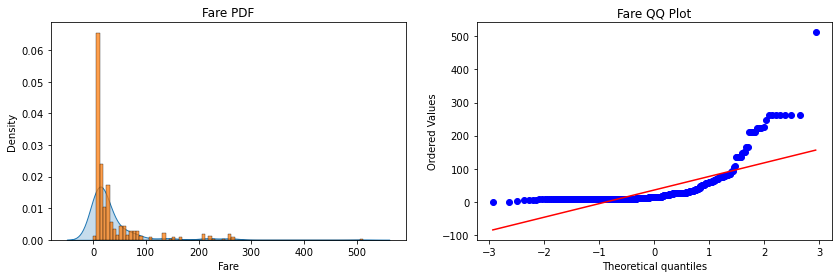

In [34]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(data=x["Fare"], shade=True)
sns.histplot(x["Fare"],stat="density")
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()


In [35]:
from sklearn.preprocessing import FunctionTransformer

In [36]:
trf = FunctionTransformer(func=np.log1p)

In [39]:
x_transformed = trf.fit_transform(x)

In [40]:
x_transformed

,Age,Fare
0,3.569533,2.178064
1,3.871201,2.079442
2,4.143135,2.369075
3,3.332205,2.268252
4,3.135494,2.586824
...,...,...
413,3.442742,2.202765
414,3.688879,4.699571
415,3.676301,2.110213
416,3.442742,2.202765


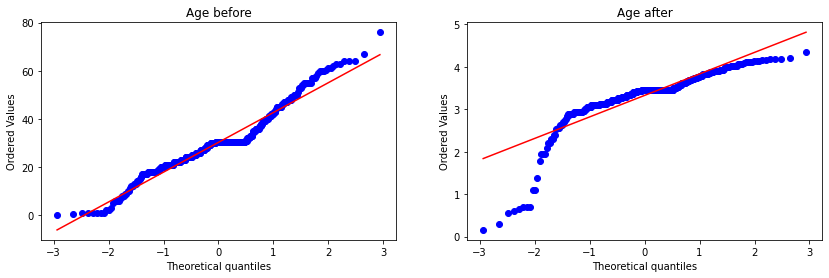

In [51]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x['Age'], dist="norm", plot=plt)
plt.title('Age before')

plt.subplot(122)
stats.probplot(x_transformed['Age'], dist="norm", plot=plt)
plt.title('Age after')

plt.show()


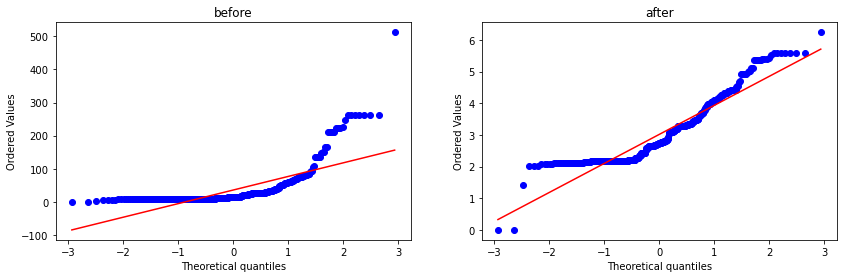

In [50]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x['Fare'], dist="norm", plot=plt)
plt.title('before')

plt.subplot(122)
stats.probplot(x_transformed['Fare'], dist="norm", plot=plt)
plt.title('after')

plt.show()

# now we can clerly see fare coulumn transfored very good but age column completly goes wrong so the best way was we just put tranform on fare column insted of age column

In [52]:
from sklearn.compose import ColumnTransformer

In [58]:
ctf = ColumnTransformer([
    ('log',FunctionTransformer(np.reciprocal),['Fare'])],
                       remainder='passthrough')

In [59]:
new_tranformed = ctf.fit_transform(x)

/home/user/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in reciprocal
  result = func(self.values, **kwargs)


In [60]:
new_tranformed

array([[1.27726971e-01, 3.45000000e+01],
       [1.42857143e-01, 4.70000000e+01],
       [1.03225806e-01, 6.20000000e+01],
       [1.15440115e-01, 2.70000000e+01],
       [8.13835198e-02, 2.20000000e+01],
       [1.08401084e-01, 1.40000000e+01],
       [1.31075342e-01, 3.00000000e+01],
       [3.44827586e-02, 2.60000000e+01],
       [1.38327892e-01, 1.80000000e+01],
       [4.14078675e-02, 2.10000000e+01],
       [1.26649611e-01, 3.02725904e+01],
       [3.84615385e-02, 4.60000000e+01],
       [1.21555866e-02, 2.30000000e+01],
       [3.84615385e-02, 6.30000000e+01],
       [1.63465468e-02, 4.70000000e+01],
       [3.60739950e-02, 2.40000000e+01],
       [8.09716599e-02, 3.50000000e+01],
       [1.38408304e-01, 2.10000000e+01],
       [1.26182965e-01, 2.70000000e+01],
       [1.38408304e-01, 4.50000000e+01],
       [1.68350168e-02, 5.50000000e+01],
       [3.15377823e-01, 9.00000000e+00],
       [3.15623688e-02, 3.02725904e+01],
       [1.62921641e-02, 2.10000000e+01],
       [3.811338

### keep in  mind you can change the value of np.log1,or what ever function you want to use